In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
# Check for missing values
print(df.isnull().sum())

# Check for '?' values
print((df == '?').sum())

# Remove negative values (if any)
df = df[(df.select_dtypes(include=[np.number]) >= 0).all(axis=1)]

print("Cleaned Data Shape:", df.shape)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Cleaned Data Shape: (150, 5)


In [22]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

print("After Outlier Removal:", df.shape)

After Outlier Removal: (149, 5)


In [23]:
from sklearn.preprocessing import StandardScaler

features = df.columns[:-1]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.898927,1.085374,-1.352896,-1.320511,setosa
1,-1.140478,-0.107257,-1.352896,-1.320511,setosa
2,-1.382029,0.369796,-1.409888,-1.320511,setosa
3,-1.502804,0.131269,-1.295904,-1.320511,setosa
4,-1.019702,1.323900,-1.352896,-1.320511,setosa


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
print("🔹 Logistic Regression Accuracy:", log_acc)
print(classification_report(y_test, log_preds))

🔹 Logistic Regression Accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



C:\Users\Veera Subandh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


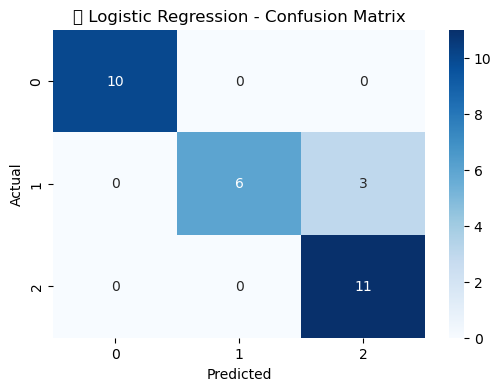

In [26]:
log_cm = confusion_matrix(y_test, log_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues',)
plt.title("🔹 Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, nb_preds)
print("🔹 Naive Bayes Accuracy:", nb_acc)
print(classification_report(y_test, nb_preds))

🔹 Naive Bayes Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.56      0.71         9
   virginica       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



C:\Users\Veera Subandh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


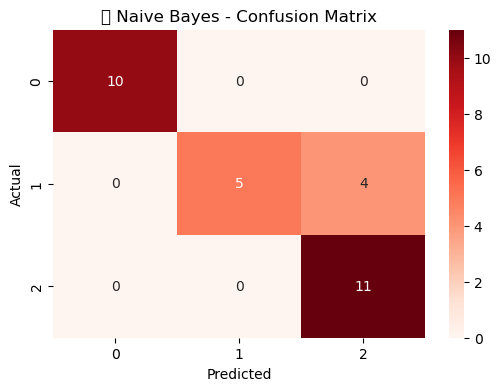

In [28]:
nb_cm = confusion_matrix(y_test, nb_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds',)
plt.title("🔹 Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()